## Data Understanding

In [1]:
#Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Libraries for machine learning modeling & confusion matrices
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors  import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from imblearn.over_sampling import SMOTENC

### Data Description

In [2]:
data = pd.read_csv('Data/Terry_Stops.csv')
data

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-8,20220000063036,32023419019,Field Contact,-,6805,1973,M,White,...,09:34:02.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 1ST W - KQ/DM RELIEF,N,Y,West,K,K3
1,-,-8,20220000233868,35877423282,Field Contact,-,8881,1988,M,Asian,...,19:20:16.0000000,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--DISTURBANCE - OTHER,911,TRAINING - FIELD TRAINING SQUAD,N,Y,South,O,O1
2,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00.0000000,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
3,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00.0000000,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00.0000000,-,-,-,NaN,N,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53649,56 and Above,35908211663,20220000238170,35908320953,Field Contact,-,8889,1977,M,White,...,04:11:19.0000000,"DISTURBANCE, MISCELLANEOUS/OTHER","DISTURBANCE, MISCELLANEOUS/OTHER",911,TRAINING - FIELD TRAINING SQUAD,N,N,West,Q,Q3
53650,56 and Above,36244081163,20220000243193,36244016178,Arrest,-,8857,1996,M,White,...,01:53:14.0000000,-,-,-,WEST PCT 2ND W - D/M RELIEF,Y,N,East,E,E3
53651,56 and Above,36540999080,20220000250573,36541078424,Field Contact,-,6805,1973,M,White,...,12:57:21.0000000,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--MISCHIEF OR NUISANCE - GENERAL,ONVIEW,WEST PCT 1ST W - KQ/DM RELIEF,N,N,West,K,K3
53652,56 and Above,36545542648,20220000251229,36545507606,Field Contact,-,7773,1978,M,White,...,02:33:21.0000000,FOUND - PERSON,FOUND - PERSON,911,NORTH PCT 3RD W - LINCOLN,N,N,North,J,J3



The data can be lumped into four categories:

##### Demographics: race, age, gender

##### Situation: weapons involved, date, time

##### Administrative: report type, precinct, officer squad, officer IDs

#### Outcome: arrest, citation, field contact, offense report


There are 53654 rows and 23 columns in our dataset. Below is a brief description of the data each column represents:

##### Subject Age Group
Subject Age Group (10 year increments) as reported by the officer.
  
##### Subject ID
Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.
    
##### GO/SC Num
General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.
    
##### Terry Stop ID
Key identifying unique Terry Stop reports.

##### Stop Resolution
Resolution of the stop as reported by the officer.
    
##### Weapon Type
Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None"     if no weapons was found.
    
##### Officer ID
Key identifying unique officers in the dataset.
    
##### Officer YOB 
Year of birth, as reported by the officer.
    
##### Officer Gender
Gender of the officer, as reported by the officer.
    
##### Officer Race
Race of the officer, as reported by the officer.
    
##### Subject Perceived Race
Perceived race of the subject, as reported by the officer.

##### Subject Perceived Gender
Perceived gender of the subject, as reported by the officer.
    
##### Reported Date
Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.
    
##### Reported Time
Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.
    
##### Initial Call Type
Initial classification of the call as assigned by 911.
    
##### Final Call Type
Final classification of the call as assigned by the primary officer closing the event.
    
##### Call Type
How the call was received by the communication center.
    
##### Officer Squad
Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).
    
##### Arrest Flag
Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).
    
##### Frisk Flag
Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.
    
##### Precinct
Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
    
##### Sector
Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
    
##### Beat
Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.


In [3]:
data.info()
# We have only 4 columns containing 'int" data type, the rest are object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53654 entries, 0 to 53653
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         53654 non-null  object
 1   Subject ID                53654 non-null  int64 
 2   GO / SC Num               53654 non-null  int64 
 3   Terry Stop ID             53654 non-null  int64 
 4   Stop Resolution           53654 non-null  object
 5   Weapon Type               53654 non-null  object
 6   Officer ID                53654 non-null  object
 7   Officer YOB               53654 non-null  int64 
 8   Officer Gender            53654 non-null  object
 9   Officer Race              53654 non-null  object
 10  Subject Perceived Race    53654 non-null  object
 11  Subject Perceived Gender  53654 non-null  object
 12  Reported Date             53654 non-null  object
 13  Reported Time             53654 non-null  object
 14  Initial Call Type     

In [4]:
# The number of rows and columns
data.shape

(53654, 23)

In [5]:
#descriptive statistics for numeric columns
data.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,5.365400e+04,5.365400e+04,5.365400e+04,53654.000000
mean,4.343049e+09,2.018040e+13,6.931744e+09,1983.457356
std,7.565102e+09,8.960437e+10,1.081950e+10,9.312311
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.016000e+13,2.074660e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,4.544425e+05,1986.000000
75%,7.731599e+09,2.020000e+13,1.262118e+10,1990.000000
max,3.743051e+10,2.022000e+13,3.742961e+10,2000.000000


In [6]:
data.isnull().sum()
# The 'Officer Squad' columns has missing values

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               489
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [7]:
data['Subject Age Group'].value_counts()
#We have no missing values

26 - 35         17930
36 - 45         11634
18 - 25         10512
46 - 55          6891
56 and Above     2782
1 - 17           2080
-                1825
Name: Subject Age Group, dtype: int64

In [8]:
data['Terry Stop ID'].duplicated().sum()
#we have 73 duplicates

73

In [9]:
data['Stop Resolution'].value_counts()
# We have no missing values

Field Contact               23006
Offense Report              16599
Arrest                      13131
Referred for Prosecution      728
Citation / Infraction         190
Name: Stop Resolution, dtype: int64

In [10]:
data['Weapon Type'].value_counts()
#we have missing values
#further investigate some columns such as 'personal weapons', 'None?Not Applicable' etc

None                                    32565
-                                       17800
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument         967
Handgun                                   342
Blunt Object/Striking Implement           125
Firearm Other                             100
Firearm                                    63
Club, Blackjack, Brass Knuckles            49
Mace/Pepper Spray                          44
Other Firearm                              41
Firearm (unk type)                         15
Taser/Stun Gun                             13
Fire/Incendiary Device                     11
None/Not Applicable                        10
Club                                        9
Rifle                                       8
Shotgun                                     4
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Brass Knuckles                              1
Blackjack                         

In [11]:
data['Officer YOB'].value_counts()
#we have no missing values

1986    3690
1987    3422
1991    2979
1984    2921
1992    2854
1990    2688
1985    2600
1988    2396
1989    2272
1982    1946
1983    1866
1993    1776
1995    1716
1979    1715
1981    1591
1994    1346
1971    1272
1976    1246
1978    1221
1977    1101
1973    1005
1996     962
1980     935
1967     792
1997     746
1970     670
1968     664
1969     590
1974     579
1975     579
1962     463
1964     459
1972     449
1965     424
1963     265
1966     235
1961     234
1958     222
1959     174
1960     161
1998     123
1900      69
1954      44
1957      43
1953      35
1999      25
2000      23
1955      21
1956      17
1948      11
1952       9
1949       5
1946       2
1951       1
Name: Officer YOB, dtype: int64

In [12]:
data['Reported Time'].value_counts()
#we will feature engineer a new column of day/night to show time of day when Terry Stops were made.

02:56:00.0000000    52
17:00:00.0000000    51
03:09:00.0000000    51
19:18:00.0000000    51
03:13:00.0000000    50
                    ..
04:00:34.0000000     1
21:37:35.0000000     1
06:46:43.0000000     1
02:52:18.0000000     1
23:21:54.0000000     1
Name: Reported Time, Length: 18104, dtype: int64

In [13]:
data['Arrest Flag'].value_counts()
#this is our target variable and we have no missing values

N    48731
Y     4923
Name: Arrest Flag, dtype: int64

In [14]:
data['Frisk Flag'].value_counts()
#we have some missing values

N    40794
Y    12382
-      478
Name: Frisk Flag, dtype: int64

In [15]:
data['Precinct'].value_counts()
# We also have some missing values

West         14070
North        11699
-            10240
East          6904
South         6363
Southwest     2320
SouthWest     1775
Unknown        200
OOJ             61
FK ERROR        22
Name: Precinct, dtype: int64

In [16]:
data['Officer Gender'].value_counts()
# We have no missing values

M    47516
F     6108
N       30
Name: Officer Gender, dtype: int64

In [17]:
data['Officer Race'].value_counts()
# We have 'Not Specified' and 'unknown' data types

White                            39376
Two or More Races                 3336
Hispanic or Latino                3278
Asian                             2399
Not Specified                     2293
Black or African American         2098
Nat Hawaiian/Oth Pac Islander      472
American Indian/Alaska Native      333
Unknown                             69
Name: Officer Race, dtype: int64

In [18]:
data['Subject Perceived Race'].value_counts()
# We have unknown values

White                                        26320
Black or African American                    15936
Unknown                                       3526
-                                             1810
Asian                                         1803
Hispanic                                      1684
American Indian or Alaska Native              1514
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       98
DUPLICATE                                        2
Name: Subject Perceived Race, dtype: int64

In [19]:
data['Subject Perceived Gender'].value_counts()
# We have unknown values

Male                                                         42251
Female                                                       10749
Unable to Determine                                            326
-                                                              239
Unknown                                                         67
Gender Diverse (gender non-conforming and/or transgender)       20
DUPLICATE                                                        2
Name: Subject Perceived Gender, dtype: int64

## Data Preparation

### Validity

In [20]:
# A preview of all the columns
data.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [21]:
# We selected only the relevant columns and dropped the unnecessary
relevant_columns=['Subject Age Group', 'Terry Stop ID','Stop Resolution', 'Weapon Type', 'Officer YOB', 'Officer Gender',
                   'Officer Race','Subject Perceived Race', 'Subject Perceived Gender','Reported Date', 'Reported Time', 
                   'Arrest Flag', 'Frisk Flag']
terry_stops = data[relevant_columns]
terry_stops

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,-,32023419019,Field Contact,-,1973,M,White,DUPLICATE,DUPLICATE,2022-03-14T00:00:00Z,09:34:02.0000000,N,Y
1,-,35877423282,Field Contact,-,1988,M,Asian,DUPLICATE,DUPLICATE,2022-09-02T00:00:00Z,19:20:16.0000000,N,Y
2,-,92317,Arrest,None,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00Z,11:32:00.0000000,N,N
3,-,28806,Field Contact,None,1965,M,White,-,-,2015-03-19T00:00:00Z,07:59:00.0000000,N,N
4,-,29599,Field Contact,None,1961,M,White,White,Male,2015-03-21T00:00:00Z,19:12:00.0000000,N,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53649,56 and Above,35908320953,Field Contact,-,1977,M,White,Black or African American,Male,2022-09-07T00:00:00Z,04:11:19.0000000,N,N
53650,56 and Above,36244016178,Arrest,-,1996,M,White,Black or African American,Male,2022-09-12T00:00:00Z,01:53:14.0000000,Y,N
53651,56 and Above,36541078424,Field Contact,-,1973,M,White,Asian,Female,2022-09-19T00:00:00Z,12:57:21.0000000,N,N
53652,56 and Above,36545507606,Field Contact,-,1978,M,White,White,Male,2022-09-20T00:00:00Z,02:33:21.0000000,N,N


In [22]:
terry_stops['Terry Stop ID'].duplicated().sum()

73

In [23]:
#we removed duplicated rows
terry_stops = terry_stops.drop_duplicates(subset='Terry Stop ID', keep='first')
terry_stops['Terry Stop ID'].duplicated().sum()

0

In [24]:
#Since we are done checking for duplicates we can now drop the column we used to check as it is no longer important
terry_stops.drop("Terry Stop ID", axis = 1,inplace=True)

### Uniformity

In [25]:
terry_stops.columns = terry_stops.columns.str.replace(" ", "_")

terry_stops= terry_stops.rename(columns=str.lower)

terry_stops


,subject_age_group,stop_resolution,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,arrest_flag,frisk_flag
0,-,Field Contact,-,1973,M,White,DUPLICATE,DUPLICATE,2022-03-14T00:00:00Z,09:34:02.0000000,N,Y
1,-,Field Contact,-,1988,M,Asian,DUPLICATE,DUPLICATE,2022-09-02T00:00:00Z,19:20:16.0000000,N,Y
2,-,Arrest,None,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00Z,11:32:00.0000000,N,N
3,-,Field Contact,None,1965,M,White,-,-,2015-03-19T00:00:00Z,07:59:00.0000000,N,N
4,-,Field Contact,None,1961,M,White,White,Male,2015-03-21T00:00:00Z,19:12:00.0000000,N,-
...,...,...,...,...,...,...,...,...,...,...,...,...
53649,56 and Above,Field Contact,-,1977,M,White,Black or African American,Male,2022-09-07T00:00:00Z,04:11:19.0000000,N,N
53650,56 and Above,Arrest,-,1996,M,White,Black or African American,Male,2022-09-12T00:00:00Z,01:53:14.0000000,Y,N
53651,56 and Above,Field Contact,-,1973,M,White,Asian,Female,2022-09-19T00:00:00Z,12:57:21.0000000,N,N
53652,56 and Above,Field Contact,-,1978,M,White,White,Male,2022-09-20T00:00:00Z,02:33:21.0000000,N,N


### Completeness

In [26]:
#we replaced blanks with 'unknown'
terry_stops['subject_age_group'].replace({'-': 'Unknown Subject Age'}, inplace=True)
terry_stops['subject_age_group'].value_counts()

26 - 35                17906
36 - 45                11617
18 - 25                10496
46 - 55                 6881
56 and Above            2777
1 - 17                  2079
Unknown Subject Age     1825
Name: subject_age_group, dtype: int64

In [27]:
terry_stops['reported_date']= terry_stops['reported_date'].apply(lambda x:x[:10])
terry_stops['reported_date'] = pd.to_datetime(terry_stops['reported_date'])

In [28]:
terry_stops['reported_month'] = pd.DatetimeIndex(terry_stops['reported_date']).month

terry_stops['reported_month'].replace(
        {1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
        10:'October', 11:'November', 12:'December'
        }, inplace = True)
terry_stops['reported_month']


0            March
1        September
2          October
3            March
4            March
           ...    
53649    September
53650    September
53651    September
53652    September
53653    September
Name: reported_month, Length: 53581, dtype: object

In [29]:
terry_stops['reported_year']= pd.DatetimeIndex(terry_stops['reported_date']).year

In [30]:
terry_stops= terry_stops.drop('reported_date', axis=1)
terry_stops

,subject_age_group,stop_resolution,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_time,arrest_flag,frisk_flag,reported_month,reported_year
0,Unknown Subject Age,Field Contact,-,1973,M,White,DUPLICATE,DUPLICATE,09:34:02.0000000,N,Y,March,2022
1,Unknown Subject Age,Field Contact,-,1988,M,Asian,DUPLICATE,DUPLICATE,19:20:16.0000000,N,Y,September,2022
2,Unknown Subject Age,Arrest,None,1984,M,Black or African American,Asian,Male,11:32:00.0000000,N,N,October,2015
3,Unknown Subject Age,Field Contact,None,1965,M,White,-,-,07:59:00.0000000,N,N,March,2015
4,Unknown Subject Age,Field Contact,None,1961,M,White,White,Male,19:12:00.0000000,N,-,March,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53649,56 and Above,Field Contact,-,1977,M,White,Black or African American,Male,04:11:19.0000000,N,N,September,2022
53650,56 and Above,Arrest,-,1996,M,White,Black or African American,Male,01:53:14.0000000,Y,N,September,2022
53651,56 and Above,Field Contact,-,1973,M,White,Asian,Female,12:57:21.0000000,N,N,September,2022
53652,56 and Above,Field Contact,-,1978,M,White,White,Male,02:33:21.0000000,N,N,September,2022


In [31]:
#creating a new column for officer age
terry_stops['officer_age']= terry_stops['reported_year'] - terry_stops['officer_yob']
#drop the column for officer year of birth
terry_stops = terry_stops.drop('officer_yob', axis=1)

In [32]:
# We sliced through the 'reported_time' column and only picked the hours
terry_stops['reported_time']= terry_stops['reported_time'].apply(lambda x:x[:2])

# We converted the hours to integer type
terry_stops['reported_time']= terry_stops['reported_time'].astype('int')

# We assigned different hours to their respectives times in the day
terry_stops['reported_time'] = terry_stops['reported_time'].replace([5, 6, 7, 8, 9, 10, 11, 12], 'morning')
terry_stops['reported_time'] = terry_stops['reported_time'].replace([13, 14, 15, 16, 17], 'afternoon')
terry_stops['reported_time'] = terry_stops['reported_time'].replace([18, 19, 20, 21], 'evening')
terry_stops['reported_time'] = terry_stops['reported_time'].replace([22, 23, 0, 1, 2, 3, 4], 'night')
terry_stops['reported_time'].value_counts()

night        17976
morning      13831
afternoon    12024
evening       9750
Name: reported_time, dtype: int64

In [33]:
terry_stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53581 entries, 0 to 53653
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         53581 non-null  object
 1   stop_resolution           53581 non-null  object
 2   weapon_type               53581 non-null  object
 3   officer_gender            53581 non-null  object
 4   officer_race              53581 non-null  object
 5   subject_perceived_race    53581 non-null  object
 6   subject_perceived_gender  53581 non-null  object
 7   reported_time             53581 non-null  object
 8   arrest_flag               53581 non-null  object
 9   frisk_flag                53581 non-null  object
 10  reported_month            53581 non-null  object
 11  reported_year             53581 non-null  int64 
 12  officer_age               53581 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 5.7+ MB


In [34]:
terry_stops['weapon_type'].replace({'-' : 'None', 'Lethal Cutting Instrument': 'Non-Firearm','Knife/Cutting/Stabbing Instrument': 'Non-Firearm', 'Handgun' : 'Firearm', 'Blunt Object/Striking Implement': 'Non-Firearm',
                          'Firearm Other':'Firearm', 'Club, Blackjack, Brass Knuckles': 'Non-Firearm', 'Mace/Pepper Spray': 'Non-Firearm',
                          'Other Firearm': 'Firearm', 'Firearm (unk type)':'Firearm', 'Taser/Stun Gun':'Non-Firearm', 'Fire/Incendiary Device':'Non-Firearm',
                          'None/Not Applicable':'None', 'Club':'Non-Firearm', 'Rifle':'Firearm', 'Shotgun':'Firearm', 'Automatic Handgun':'Firearm',
                          'Personal Weapons (hands, feet, etc.)':'Non-Firearm', 'Brass Knuckles':'Non-Firearm', 'Blackjack':'Non-Firearm' }, inplace = True)
terry_stops['weapon_type'].value_counts()

None           50375
Non-Firearm     2642
Firearm          564
Name: weapon_type, dtype: int64

In [35]:
#replacing missing values with N
terry_stops["frisk_flag"].replace({"-":"N"},inplace = True)


In [36]:
# We replaced the 'unkown' values with 'Not Specified'
terry_stops['officer_race'].replace({'Unknown':'Unknown Officer Race'}, inplace = True)

In [37]:
# We have replaced all the missing and duplicated values with unkown
terry_stops["subject_perceived_race"].replace({"Other":"Unknown Subject Race","DUPLICATE":"Unknown Subject Race","-":"Unknown Subject Race",
                                               'Black or African American':'Subject Black or African American', 'White':'Subject White',
                                               'American Indian or Alaska Native':'Subject American Indian or Alaska Native', 'Asian': 'Subject Asian',
                                               'Hispanic':'Subject Hispanic','Native Hawaiian or Other Pacific Islander': 'Subject Native Hawaiian or Other Pacific Islander'}, inplace=True)

In [38]:
# We have replaced the missing and unkown values with unkown
terry_stops['subject_perceived_gender'].replace({'-': 'Unknown Subject Gender', 'Unable to Determine': 'Unknown Subject Gender', 'DUPLICATE': 'Unknown Subject Gender' }, inplace=True)


### Checking for Outliers

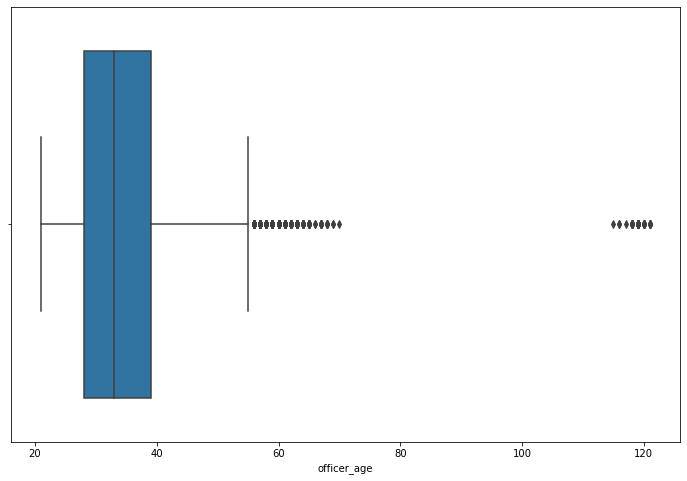

In [39]:
plt.figure(figsize=(12,8))

sns.boxplot(x = 'officer_age', data = terry_stops)

# Display the plot
plt.show()

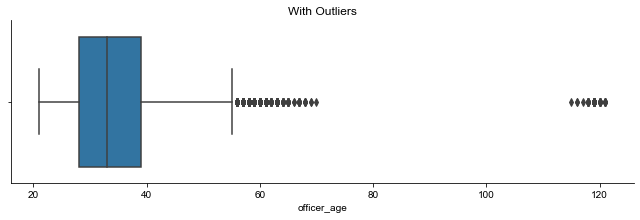

In [40]:
sns.catplot(x='officer_age', data=terry_stops, kind='box', height=3, aspect=3).set(title="With Outliers");
sns.set(rc={'figure.figsize':(16,12)})

### Dealing with Outliers

In [41]:
terry_stops = terry_stops[terry_stops['officer_age']<=65]
terry_stops['officer_age'].max()

65

## Exploratory Data Analysis (EDA)
   
 ### Univariate Analysis

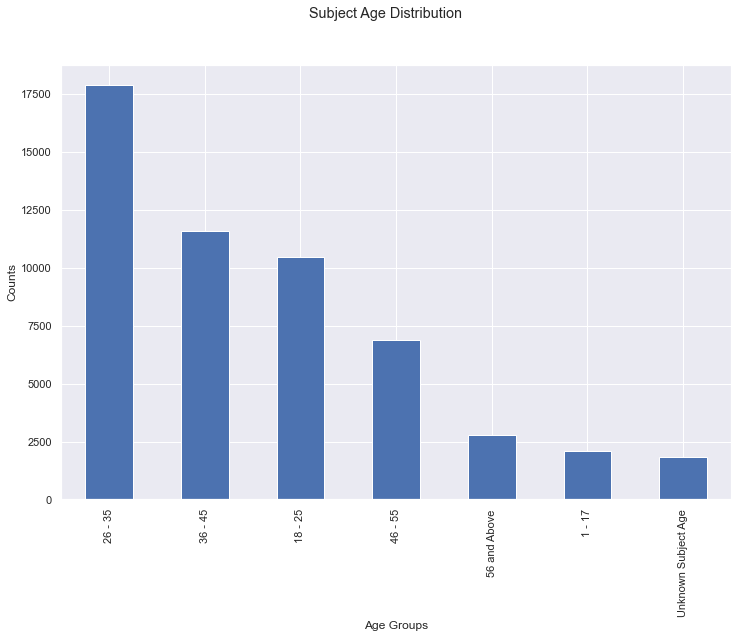

In [42]:
plt.figure(figsize=(12,8))
terry_stops['subject_age_group'].value_counts().plot(kind='bar')
plt.suptitle("Subject Age Distribution")
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.show()

In [43]:
terry_stops.columns

Index(['subject_age_group', 'stop_resolution', 'weapon_type', 'officer_gender',
       'officer_race', 'subject_perceived_race', 'subject_perceived_gender',
       'reported_time', 'arrest_flag', 'frisk_flag', 'reported_month',
       'reported_year', 'officer_age'],
      dtype='object')

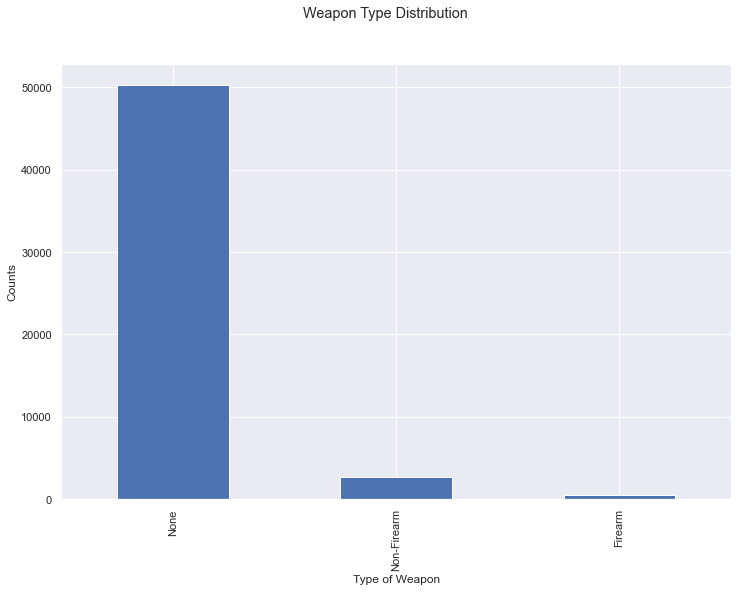

In [44]:
plt.figure(figsize=(12,8))
terry_stops['weapon_type'].value_counts().plot(kind='bar')
plt.suptitle("Weapon Type Distribution")
plt.xlabel("Type of Weapon")
plt.ylabel("Counts")
plt.show()

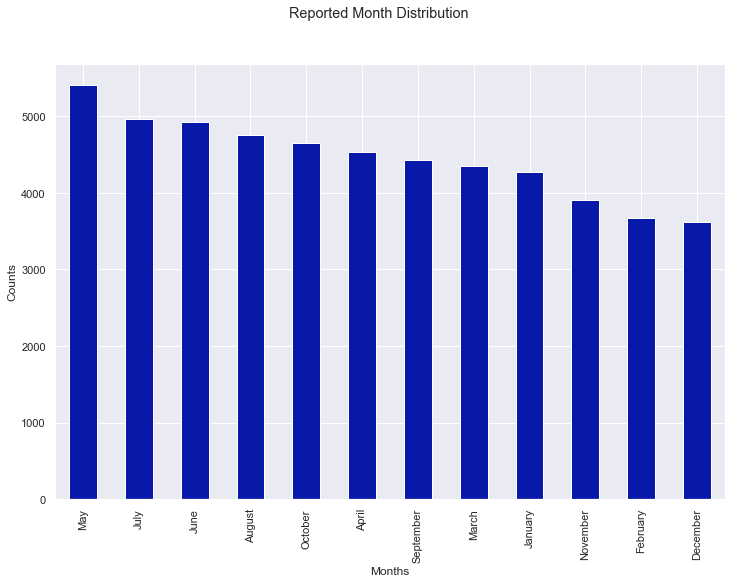

In [45]:
plt.figure(figsize=(12,8))
colors=['#0818A8']
terry_stops['reported_month'].value_counts().plot(kind='bar', color=colors)
plt.suptitle("Reported Month Distribution")
plt.xlabel("Months")
plt.ylabel("Counts")
plt.show()

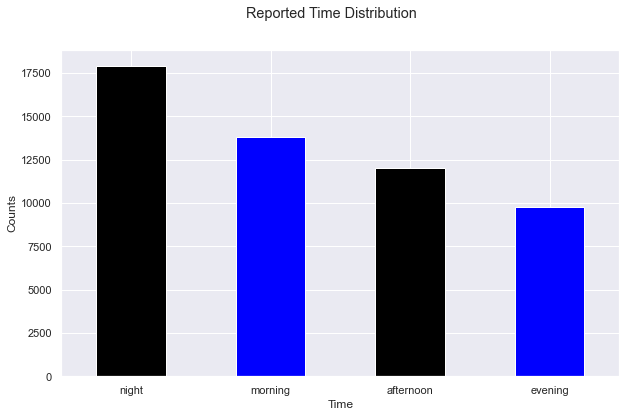

In [46]:
plt.figure(figsize=(10,6))
c= ['black','blue']
terry_stops['reported_time'].value_counts().plot(kind='bar',color=c)
plt.suptitle("Reported Time Distribution")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

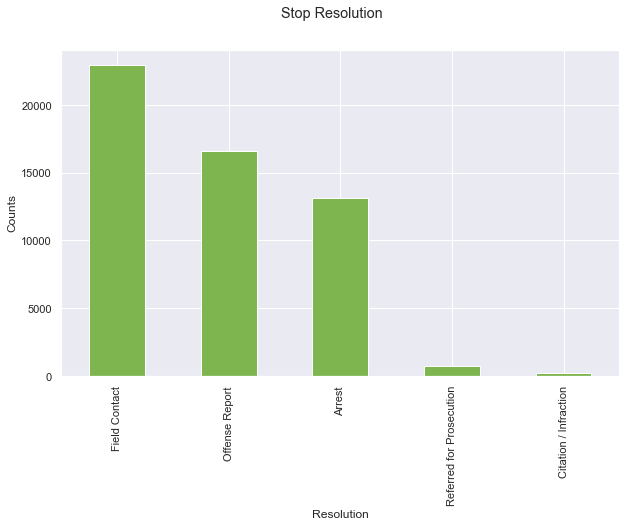

In [47]:
plt.figure(figsize=(10,6))
color= '#7eb54e'
terry_stops['stop_resolution'].value_counts().plot(kind='bar',color=color);
plt.suptitle("Stop Resolution")
plt.xlabel("Resolution")
plt.ylabel("Counts");

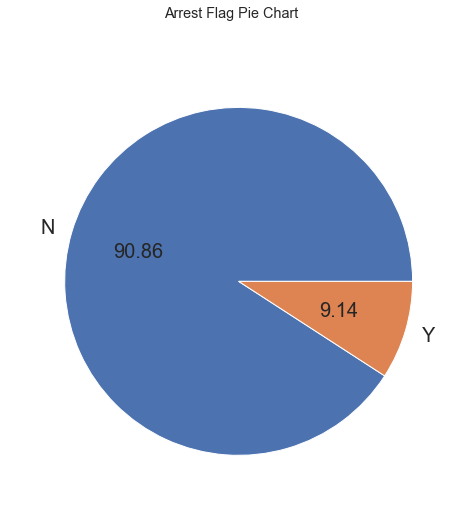

In [48]:
terry_stops.groupby('arrest_flag').size().plot(kind='pie', figsize=[8,8], fontsize=20, autopct='%.2f')
plt.ylabel(" ")
plt.suptitle("Arrest Flag Pie Chart");

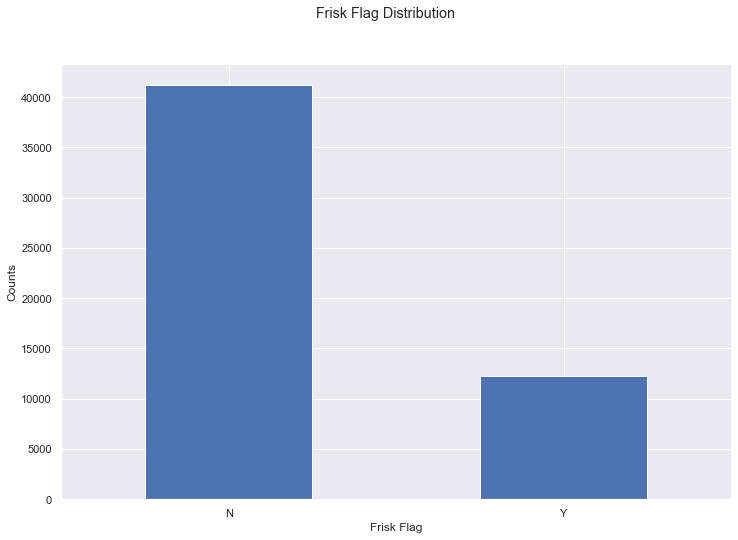

In [49]:
plt.figure(figsize=(12,8))
terry_stops['frisk_flag'].value_counts().plot(kind='bar')
plt.suptitle("Frisk Flag Distribution")
plt.xlabel("Frisk Flag")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

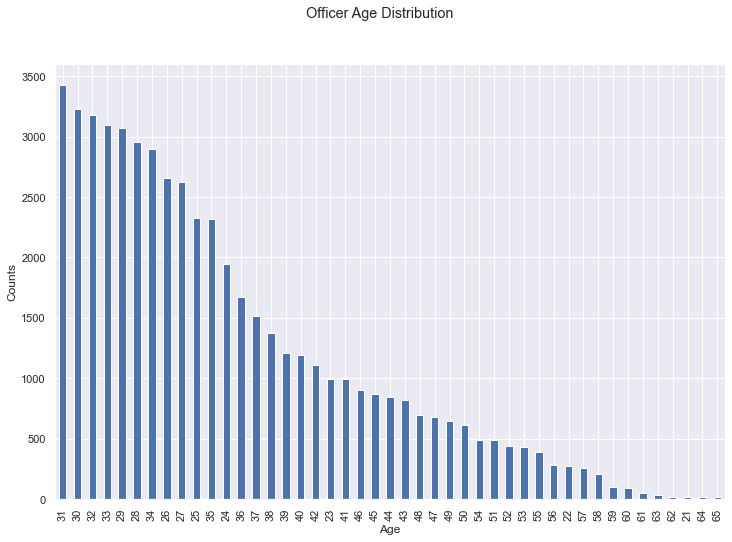

In [50]:
plt.figure(figsize=(12,8))
terry_stops['officer_age'].value_counts().plot(kind='bar')
plt.suptitle("Officer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.show()

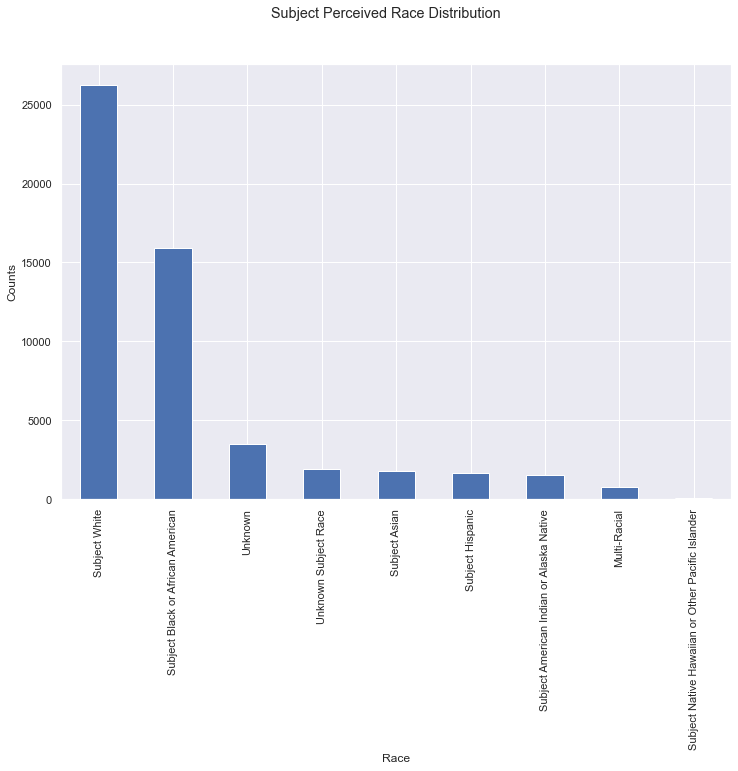

In [51]:
plt.figure(figsize=(12,8))
terry_stops['subject_perceived_race'].value_counts().plot(kind='bar')
plt.suptitle("Subject Perceived Race Distribution")
plt.xlabel("Race")
plt.ylabel("Counts")
plt.show()

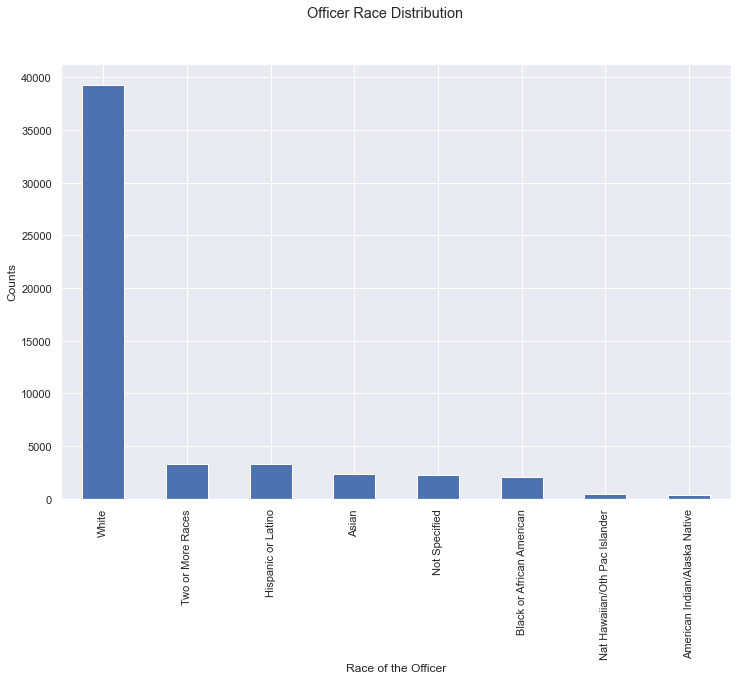

In [52]:
plt.figure(figsize=(12,8))
terry_stops['officer_race'].value_counts().plot(kind='bar')
plt.suptitle("Officer Race Distribution")
plt.xlabel("Race of the Officer")
plt.ylabel("Counts")
plt.show()

### Bivariate Analysis

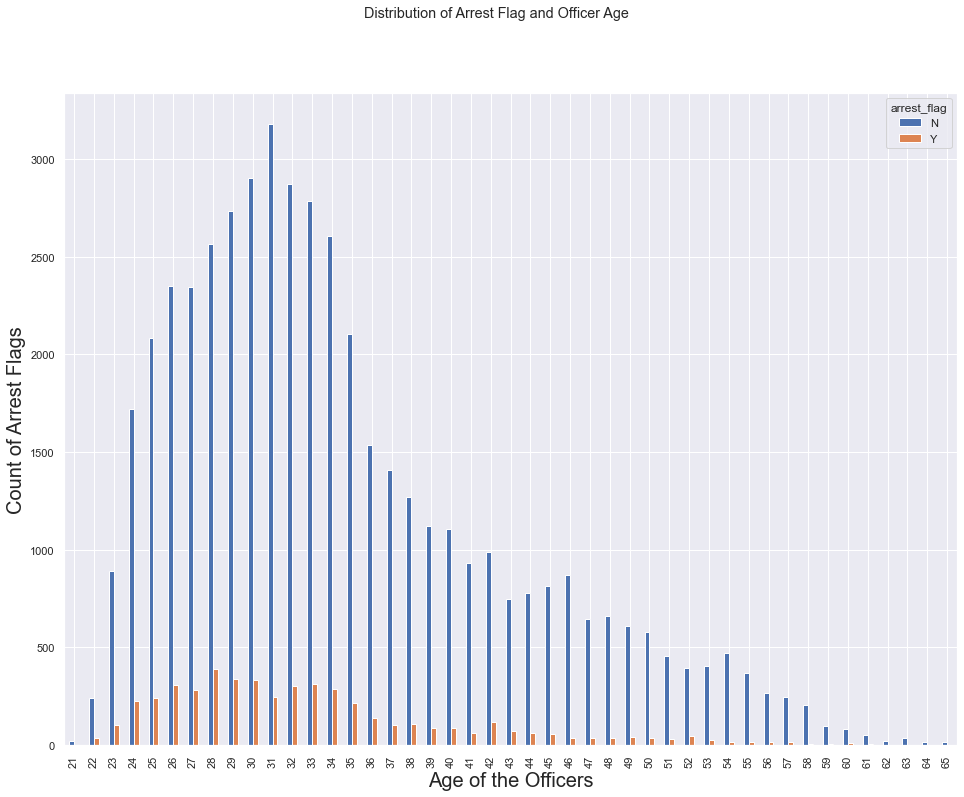

In [53]:
df = terry_stops[['officer_age', 'arrest_flag']]
df =df.groupby(['officer_age', 'arrest_flag']).size()
df =df.unstack()
df.plot(kind='bar')
plt.ylabel('Count of Arrest Flags', fontsize = 20)
plt.xlabel('Age of the Officers', fontsize = 20)
plt.suptitle('Distribution of Arrest Flag and Officer Age');

<AxesSubplot:xlabel='subject_age_group'>

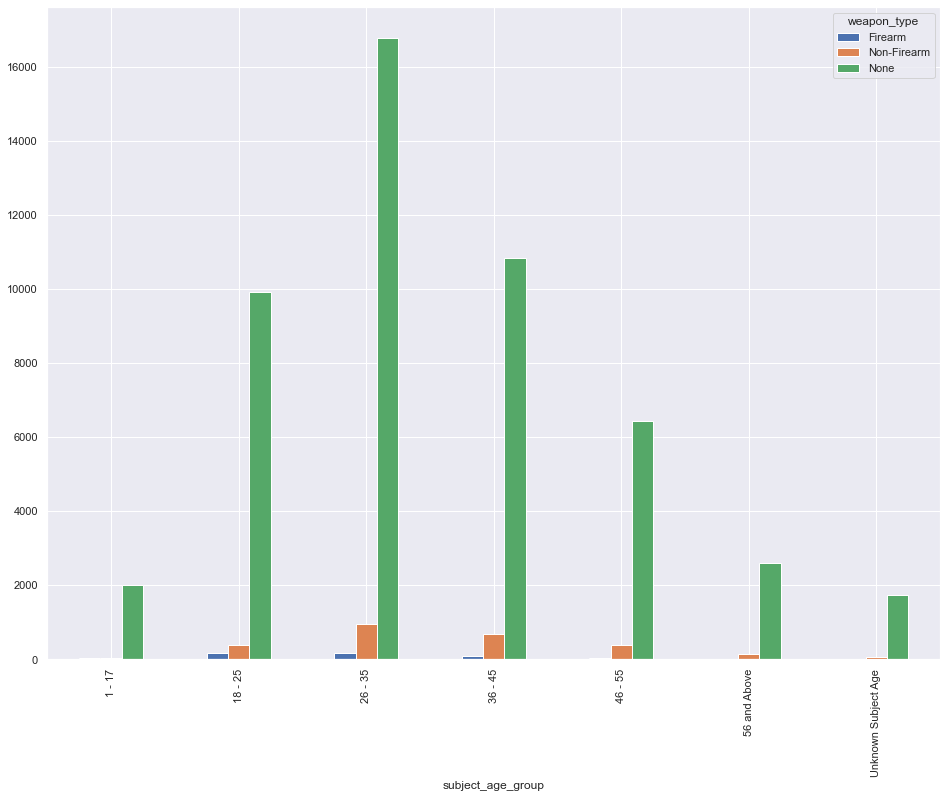

In [54]:
df = terry_stops[['subject_age_group', 'weapon_type']]
df =df.groupby(['subject_age_group', 'weapon_type']).size()
df =df.unstack()
df.plot(kind='bar')

# Modeling
### Modeling Preprocessing
#### Converting the target variable to binary.

In [55]:
terry_stops['arrest_flag'] = (terry_stops['arrest_flag']=='Y').astype(int)
terry_stops

,subject_age_group,stop_resolution,weapon_type,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_time,arrest_flag,frisk_flag,reported_month,reported_year,officer_age
0,Unknown Subject Age,Field Contact,None,M,White,Unknown Subject Race,Unknown Subject Gender,morning,0,Y,March,2022,49
1,Unknown Subject Age,Field Contact,None,M,Asian,Unknown Subject Race,Unknown Subject Gender,evening,0,Y,September,2022,34
2,Unknown Subject Age,Arrest,None,M,Black or African American,Subject Asian,Male,morning,0,N,October,2015,31
3,Unknown Subject Age,Field Contact,None,M,White,Unknown Subject Race,Unknown Subject Gender,morning,0,N,March,2015,50
4,Unknown Subject Age,Field Contact,None,M,White,Subject White,Male,evening,0,N,March,2015,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53649,56 and Above,Field Contact,None,M,White,Subject Black or African American,Male,night,0,N,September,2022,45
53650,56 and Above,Arrest,None,M,White,Subject Black or African American,Male,night,1,N,September,2022,26
53651,56 and Above,Field Contact,None,M,White,Subject Asian,Female,morning,0,N,September,2022,49
53652,56 and Above,Field Contact,None,M,White,Subject White,Male,night,0,N,September,2022,44


#### Splitting the dataset into training and testing data.

In [56]:
X = terry_stops.drop('arrest_flag', axis =1)
y = terry_stops['arrest_flag']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

#### Performing a SMOTE analysis to deal with class imbalance.

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42791 entries, 32620 to 31720
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         42791 non-null  object
 1   stop_resolution           42791 non-null  object
 2   weapon_type               42791 non-null  object
 3   officer_gender            42791 non-null  object
 4   officer_race              42791 non-null  object
 5   subject_perceived_race    42791 non-null  object
 6   subject_perceived_gender  42791 non-null  object
 7   reported_time             42791 non-null  object
 8   frisk_flag                42791 non-null  object
 9   reported_month            42791 non-null  object
 10  reported_year             42791 non-null  int64 
 11  officer_age               42791 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 4.2+ MB


In [59]:
# Previous original class distribution
print(y_train.value_counts()) 

# Fit SMOTE to training data
smote_nc = SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,9], random_state=0)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

0    38857
1     3934
Name: arrest_flag, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    38857
1    38857
Name: arrest_flag, dtype: int64


### One-Hot Encoding.

Categorical Data

In [60]:
# One-hot encode the categorical data
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
#Training Data
X_train_categorical = X_train_resampled.select_dtypes(exclude=["int64", "float64"]).copy()
X_train_ohe = ohe.fit_transform(X_train_categorical)
#Testing Data
X_test_categorical = X_test.select_dtypes(exclude=["int64", "float64"]).copy()
X_test_ohe = ohe.transform(X_test_categorical)


In [61]:
X_train_ohe_df = pd.DataFrame(X_train_ohe, index=X_train_categorical.index, columns=np.hstack(ohe.categories_))
X_test_ohe_df = pd.DataFrame(X_test_ohe, index=X_test_categorical.index, columns=np.hstack(ohe.categories_))

In [62]:
X_test_ohe_df

,1 - 17,18 - 25,26 - 35,36 - 45,46 - 55,56 and Above,Unknown Subject Age,Arrest,Citation / Infraction,Field Contact,...,December,February,January,July,June,March,May,November,October,September
208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37932,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5339,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29295,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5302,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14503,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Numeric Data

In [63]:
numeric_features = ['reported_year', 'officer_age']
X_train_numeric = X_train_resampled[numeric_features].copy()
X_test_numeric = X_test[numeric_features].copy()

In [64]:
scaler = MinMaxScaler()
# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [65]:
X_train_numeric_df = pd.DataFrame(X_train_scaled, index=X_train_numeric.index, columns=X_train_numeric.columns)
X_test_numeric_df = pd.DataFrame(X_test_scaled, index=X_test_numeric.index, columns=X_test_numeric.columns)


In [66]:
X_train_full = pd.concat([X_train_ohe_df, X_train_numeric_df], axis=1)
X_test_full = pd.concat([X_test_ohe_df, X_test_numeric_df], axis=1)

Joining the One Hot Encoded Categorical Data and Normalized Numeric Data

The following are the training and the testing datasets to be used:
 1. X_train_full
 2. y_train_resampled
 3. X_test_full
 4. y_test

In [67]:
X_train_full.columns

Index(['1 - 17', '18 - 25', '26 - 35', '36 - 45', '46 - 55', '56 and Above',
       'Unknown Subject Age', 'Arrest', 'Citation / Infraction',
       'Field Contact', 'Offense Report', 'Referred for Prosecution',
       'Firearm', 'Non-Firearm', 'None', 'F', 'M',
       'American Indian/Alaska Native', 'Asian', 'Black or African American',
       'Hispanic or Latino', 'Nat Hawaiian/Oth Pac Islander', 'Not Specified',
       'Two or More Races', 'White', 'Multi-Racial',
       'Subject American Indian or Alaska Native', 'Subject Asian',
       'Subject Black or African American', 'Subject Hispanic',
       'Subject Native Hawaiian or Other Pacific Islander', 'Subject White',
       'Unknown', 'Unknown Subject Race', 'Female',
       'Gender Diverse (gender non-conforming and/or transgender)', 'Male',
       'Unknown', 'Unknown Subject Gender', 'afternoon', 'evening', 'morning',
       'night', 'N', 'Y', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March',

## Baseline Model.
### Random Forest Classifier

Initial Model

In [68]:
forest = RandomForestClassifier (random_state = 6)
forest.fit(X_train_full, y_train_resampled)
forest_testpreds = forest.predict(X_test_full)
forest_acc = accuracy_score(y_test, forest_testpreds)
print('Forest accuracy_score is:', forest_acc)
tn, fp, fn, tp = confusion_matrix(y_test, forest_testpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

Forest accuracy_score is: 0.9942045242101327
True negatives:  9682 
False positives:  60 
False negatives:  2 
True positives:  954


Grid SearchCV Random Forest

In [69]:
forest_param = {
        'n_estimators': [50, 100, 200],
        'max_features': [0.25, 0.50],
        'max_depth': [5, 7, 9],
        'criterion': ['gini']
}

In [70]:
#forest_CV = RandomForestClassifier(random_state=6)
#forest_CV = GridSearchCV(estimator=forest_CV, param_grid=forest_param, cv=3)
#forest_CV.fit(X_train_full, y_train_resampled)

In [71]:
#print(forest_CV.best_params_)
#print(forest_CV.best_estimator_)
#print("The Accuracy Score is:", forest_CV.best_score_)

## Second Model

### Decision Tree Classifier

Initial Model


In [72]:
tree = DecisionTreeClassifier(random_state=6)
tree.fit(X_train_full, y_train_resampled)
tree_testpreds = tree.predict(X_test_full)
tree_acc = accuracy_score(y_test, tree_testpreds)
print('tree accuracy_score is:', tree_acc)
tn, fp, fn, tp = confusion_matrix(y_test, tree_testpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)


tree accuracy_score is: 0.9943914750420639
True negatives:  9688 
False positives:  54 
False negatives:  6 
True positives:  950


Grid SearchCV Decision Tree

In [73]:
tree_param = {
        'max_depth': [3, 4, 5],
        'min_samples_leaf': [0.04, 0.06, 0.08],
        'max_features': [0.2, 0.4, 0.6],
        'criterion': ['gini', 'entropy']
}

In [74]:
#tree_CV = DecisionTreeClassifier(random_state=6)
#tree_CV = GridSearchCV(estimator=tree_CV, param_grid=tree_param, cv=3)
#tree_CV.fit(X_train_full, y_train_resampled)

In [75]:
#print(tree_CV.best_params_)
#print(tree_CV.best_estimator_)
#print("The Accuracy Score is:", tree_CV.best_score_)

## Third Model

### KNN Classifier

Initial Model

In [76]:
knn = KNeighborsClassifier()
knn.fit(X_train_full, y_train_resampled)
knn_testpreds = knn.predict(X_test_full)
knn_acc = accuracy_score(y_test, knn_testpreds)
print('tree accuracy_score is:', knn_acc)
tn, fp, fn, tp = confusion_matrix(y_test, knn_testpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

tree accuracy_score is: 0.9275565526266591
True negatives:  9024 
False positives:  718 
False negatives:  57 
True positives:  899


Grid SearchCV KNN Classifier

In [77]:
knn_param = {
        'max_depth': [3, 4, 5],
        'min_samples_leaf': [0.04, 0.06, 0.08],
        'max_features': [0.2, 0.4, 0.6],
        'criterion': ['gini', 'entropy']
}

In [78]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
# Another parameter besides k that we might vary is the weights parameters
weight_options = ['uniform', 'distance']
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)
# we create a list
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [79]:
#grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
#grid.fit(X_train_full, y_train_resampled)

In [80]:
#print(grid.best_params_)
#print(grid.best_estimator_)
#print("The Accuracy Score is:", grid.best_score_)

Compare the Accuracy Scores of all models

In [81]:
print('Forest Initial Model Accuracy Score is:', forest_acc)
print("Forest GridSearchCV Accuracy Score is:", forest_CV.best_score_)
print(" ")
print('Decision Tree Initial Model Accuracy Score is:', tree_acc)
print("Decision Tree GridSearchCV Accuracy Score is:", tree_CV.best_score_)
print(" ")
print('KNN Initial Model Accuracy Score is:', knn_acc)
print("KNN GridSearchCV Accuracy Score is::", grid.best_score_)


Forest Initial Model Accuracy Score is: 0.9942045242101327


NameError: name 'forest_CV' is not defined

## Selecting the Best Model

## Feature Selection

In [82]:
from sklearn.linear_model import Lasso
from sklearn import metrics 
from sklearn.metrics import accuracy_score, f1_score, recall_score
lasso = Lasso(alpha = 0.001, normalize = False)
lasso = lasso.fit(X_train_full, y_train_resampled)
y_train_predFS = lasso.predict(X_train_full)

<AxesSubplot:title={'center':'Modal Coefficients'}>

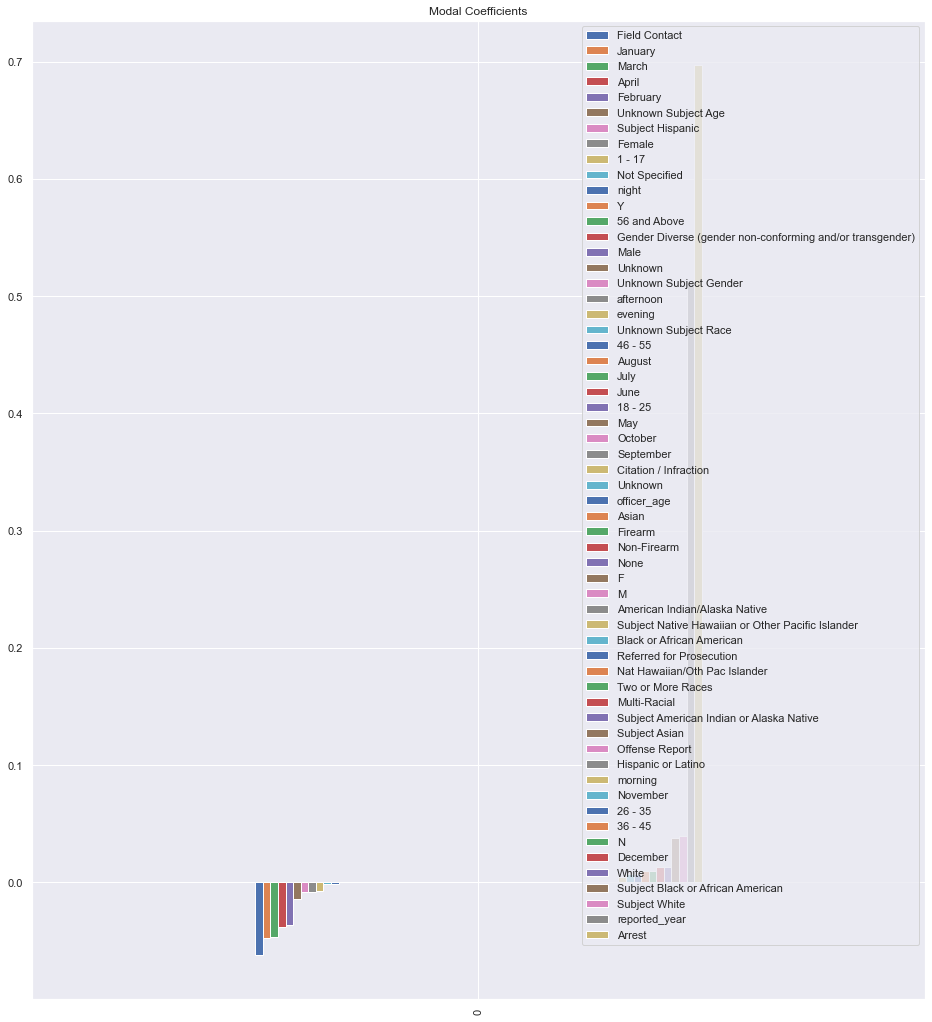

In [83]:
lasso_coef = pd.DataFrame(data=lasso.coef_).T
lasso_coef.columns = X_train_full.columns
lasso_coef = lasso_coef.T.sort_values(by=0).T
lasso_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,18))

In [84]:
lasso_coef.T

,0
Field Contact,-6.159451e-02
January,-4.769776e-02
March,-4.666403e-02
April,-3.757858e-02
February,-3.614831e-02
Unknown Subject Age,-1.395488e-02
Subject Hispanic,-8.301709e-03
Female,-7.922461e-03
1 - 17,-7.297602e-03
Not Specified,-1.715582e-03


#### Conclusion on Feature Selection

* Notes about features
* Interestingly, male gender does not influence arrests at all.
* Interestingly, some subject races have been dropped despite hypothesis testing determining there is an association. Perhaps the association is very weak, so it was dropped in the model. There is another study done using the same data that could not accurately predict race of a subject of a Terry Stop based on officer demographic data. 
* It seems like only morning is not relevant to arrests, but the other hours of the day are.
* Frisk Flag Y is not relevant to arrests. Strange, as Frisking usually leads to more information about the subject.
* Interestingly, if the officer did not check for weapons, this is positively correlated with arrests.